# Gerando nuvem de palavras

[Aqui](#) nós aprendemos a gerar os gráficos t-SNE com noso corpus do Harry Potter.

Neste código, vamos gerar as nuvens de palavras (*wordclouds*) com a biblioteca ```wordcloud```.

### Vamos importar as bibliotecas necessárias


In [2]:
from gensim.models import KeyedVectors
from wordcloud import WordCloud


### Carregando o modelo já treinado

In [4]:
#model = KeyedVectors.load_word2vec_format("word2vec-harry-potter.bin", binary=True)
model = KeyedVectors.load("word2vec-harry-potter.model")

### Gerar um dicionário com as palavras do modelo
Caso você use a biblioteca ```gensim``` versão 1.0.0 ou superior, use o código como ele está (```model.wv.vocab```). Caso contrário, descomente a linha acima pra que funcione (```model.vocab```).

In [11]:
ponct = [':', ';', '!', '?', '.', ',', '[', ']', '@', '#', '(', ')', '/', '"', "'"]

w2v = dict()
#for item in model.vocab:
for item in model.wv.vocab: #gensim 1.0.0+
    it = item.lower()
    for let in it:
        if let in ponct:
            it = it.replace(let, '')
    if it == '':
        continue
    else:
        if it in w2v:
            #w2v[it]+=model.vocab[item].count
            w2v[it]+=model.wv.vocab[item].count #gensim 1.0.0+
        else:
            #w2v[it]=model.vocab[item].count
            w2v[it]=model.wv.vocab[item].count #gensim 1.0.0+
            
w2vSorted=dict(sorted(w2v.items(), key=lambda x: x[1],reverse=True))

import pandas as pd

pd.set_option('max_colwidth',150)
data = pd.DataFrame.from_dict(w2vSorted.items())
data.columns = ['Word', 'Count']
data = data.sort_index()
data.head(20)

,Word,Count
0,o,58745
1,e,34965
2,harry,17382
3,nao,16026
4,dizer,15564
5,voce,11452
6,ron,5725
7,hermione,5293
8,ter,5024
9,olhar,4910


### Gerando a nuvem de palavras (unigramas)

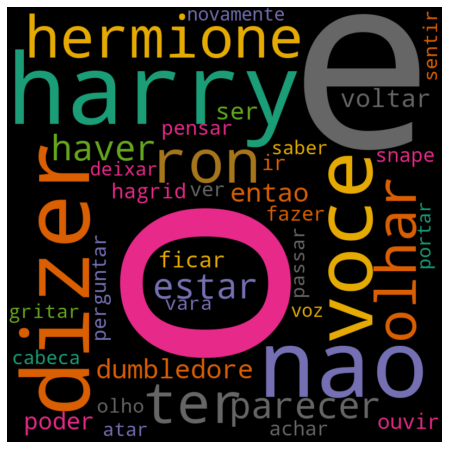

In [29]:
stop_words = ["o", "a", "e", "da", "meu", "em", "você", "de", "ao", "os","nao"]

# configuracoes
wcBr = WordCloud(width = 800,
               height = 800,
               stopwords = stop_words,
               colormap = "Dark2",
               min_font_size = 10,
               max_words=40)
               
wcBr.generate_from_frequencies(frequencies = w2v)

import matplotlib.pyplot as plt

#imrimir
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wcBr, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_bigram") #salva imagem no diretorio
    
plt.show()

### Gerando a nuvem de palavras (bigramas)

Vamos gerar também a nuvem de bigramas, que são duas palavras que aparecem juntas com frequencia e que fazem sentido unidas. Para isso primeiro vamos encontrar os bigramas no modelo.

In [24]:
# bigramas frequentes

bigr = {word : count for (word, count) in w2vSorted.items() for letter in word if (letter == '_')}

pd.set_option('max_colwidth',150)
bg = pd.DataFrame.from_dict(bigr.items())
bg.columns = ['Word', 'Count']
bg = bg.sort_index()
bg.head(20) #top 10

,Word,Count
0,sr_weasley,1227
1,professorar_mcgonagall,608
2,comensal_morte,494
3,tio_valter,434
4,dizer_rony,350
5,atro_dele,255
6,voz_alto,251
7,ter_acabar,227
8,tio_petunia,226
9,professorar_trelawney,203


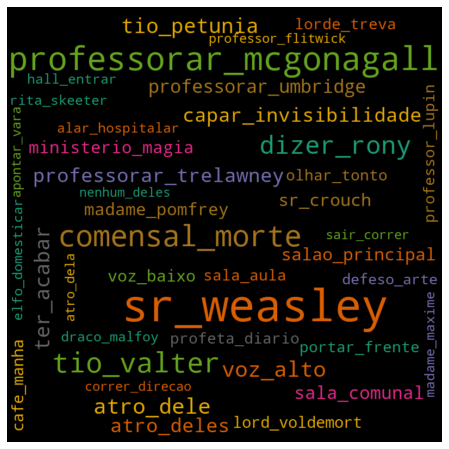

In [25]:
from wordcloud import WordCloud
stop_words = ["o","a","e","da", "meu", "em", "você", "de", "ao", "os"]

# configuracao
wcBr = WordCloud(width = 800,
               height = 800,
               stopwords = stop_words,
               colormap = "Dark2",
               min_font_size = 10,
               max_words=40)
               
wcBr.generate_from_frequencies(frequencies = bigr)

import matplotlib.pyplot as plt

#imprime
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wcBr, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_bigram") #salva imagem no diretorio
    
plt.show()

## Nuvem de palavras - livro a livro

Vamos gerar a nuvem de palavra em separado para cada livro. Este é o código para o livro 1, depois basta fazer um *loop* para executar o código para os demais livros da série.

Para isso, vamos precisar de um arquivo TXT para cada livro em separado.

## Livro 1

In [47]:
file = open(r"livro1.txt", "r", encoding='UTF-8')
df = pd.DataFrame(file)
df.columns = ['lines']
df = df.sort_index()
file.close()

In [48]:
df

,lines
0,sra e o sr dursley numerar ruir alfeneiro orgulhar estar perfeitamente normal\n
1,ultimar pessoa voce esperar estar envolvido estranhar misterioso simplesmente nao tolerar absurdo\n
2,o sr dursley o diretor empresar chamar grunnings brocar\n
3,homem e musculoso quase nenhum pescoco ter bigode\n
4,sr dursley magro e loiro e ter quase o dobrar quantidade normal pescoco o util ja passar esticar o pescoco cercar jardim espionar vizinho\n
...,...
5006,ver voce verao entao\n
5007,esperar voce ter er feriar dizer hermione olhar incerto o tio valter chocar alguem poder tao desagradavel\n
5008,oh ir dizer harry e ficar surpreso o sorriso espalhar rostir\n
5009,nao nao permissao magia casar\n


Precisamos concatenar todas as linhas em uma única *string* e retiraras quebras de linha (\n).

In [53]:
all_txt = " ".join(s for s in df['lines'])


In [56]:
all_txt[0:200]

'sra e o sr dursley numerar ruir alfeneiro orgulhar estar perfeitamente normal\n ultimar pessoa voce esperar estar envolvido estranhar misterioso simplesmente nao tolerar absurdo\n o sr dursley o diretor'

In [57]:
all_txt2 = all_txt.replace('\n', ' ')


In [58]:
all_txt2[0:200]

'sra e o sr dursley numerar ruir alfeneiro orgulhar estar perfeitamente normal  ultimar pessoa voce esperar estar envolvido estranhar misterioso simplesmente nao tolerar absurdo  o sr dursley o diretor'

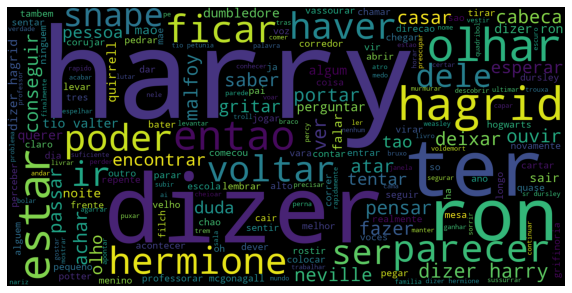

In [61]:
# lista de stopword
stopwords = ["e", "o", "voce", "nao", "da", "meu", "em", "você", "de", "ao", "os"]

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_txt2)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("wordcloud-livro1.png")

## Livro 2
<img src='nuvempalavra2.jpg'/>


## Livro 3
![Livro 3 - Nuvem de palavras](https://raw.githubusercontent.com/lisaterumi/word2vec-harry-potter-portugues/main/img/nuvem-palavra3.jpg?token=AF4SJYPIG3EYYSWFV5W3A3K76O6QI)


## Livro 4
![Livro 4 - Nuvem de palavras](https://raw.githubusercontent.com/lisaterumi/word2vec-harry-potter-portugues/main/img/nuvem-palavra4.jpg?token=AF4SJYNIM4UGCHD5ADDQ5Q276O6KO)


## Livro 5
![Livro 5 - Nuvem de palavras](https://raw.githubusercontent.com/lisaterumi/word2vec-harry-potter-portugues/main/img/nuvem-palavra5.jpg?token=AF4SJYIB63LILBLAA3T27CK76O5WO)


## Livro 6
<img src='img/nuvem-palavra6.jpg')
<img src='img/nuvem-palavra6.JPG')

## Livro 7
![Livro 7 - Nuvem de palavras](img/nuvem-palavra7.jpg)
![Livro 7 - Nuvem de palavras](img/nuvem-palavra7.JPG)

Como podemos perceber, **harry** sempre é a palavra mais frequente. Também vemos que os seus amigos **ron** e **hermione** sempre estão presentes :)

Nosso próximo passo, vamos fazer uma [análise de sentimentos](#) de cada um dos livros em separado.
